# Day 1

## Step 1: Importing the libraries

In [3]:
import numpy as np
import pandas as pd

## Step 2: Importing dataset

In [6]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,3].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 3: Handling the missing data

In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 4: Encoding categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencode_X = LabelEncoder() 
X[:,0] = labelencode_X.fit_transform(X[:,0])
X[:,0]

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

### Creating a dummy variable

In [22]:
#categorical_features是需要编码的列索引
onehotencoder = OneHotEncoder(categorical_features= [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
X

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.40000000e+01, 7.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.70000000e+01, 4.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+01, 5.40000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.80000000e+01, 6.10000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 4.00000000e+01, 6.37777778e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01, 5.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.87777778e+01, 5.

## Step 5: Splitting the datasets into training sets and Test sets

In [26]:
#test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量,random_state：是随机数的种子
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

## Step 6: Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
X_train

array([[ 1.        , -1.        ,  1.        , -1.        ,  2.64575131,
        -0.77459667,  0.26306757,  0.12381479],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.25350148,  0.46175632],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -1.97539832, -1.53093341],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445,  0.05261351, -1.11141978],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  1.64058505,  1.7202972 ],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -0.0813118 , -0.16751412],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  0.95182631,  0.98614835],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.59788085, -0.48214934]])

# Day 2 简单线性回归

##  Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/studentscores.csv')
X = dataset.iloc[:,:1].values
Y = dataset.iloc[:,1].values

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/4,random_state = 0)
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

## Step 2: Fitting Simple Linear Regression Model to the training set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,Y_train)

## Step 3: Predecting the Result

In [5]:
Y_pred = regressor.predict(X_test)

## Step 4: Visualization

### Visualising the Training results

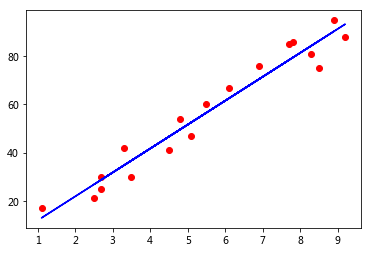

In [6]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'b')

### Visualizing the test results

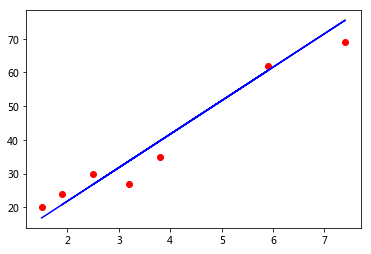

In [7]:
plt.scatter(X_test,Y_test,color = 'r')
plt.plot(X_test,Y_pred,color = 'b')

## Mathematical principle supplement

### 最小二乘法

　　回归分析中，如果只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。对于二维空间线性是一条直线；对于三维空间线性是一个平面，对于多维空间线性是一个超平面。

　　对于一元线性回归模型, 假设从总体中获取了n组观察值（X1，Y1），（X2，Y2）， …，（Xn，Yn）。对于平面中的这n个点，可以使用无数条曲线来拟合。要求样本回归函数尽可能好地拟合这组值。综合起来看，这条直线处于样本数据的中心位置最合理。 选择最佳拟合曲线的标准可以确定为：使总的拟合误差（即总残差）达到最小。

　　最常用的是普通最小二乘法（ Ordinary Least Square，OLS）：所选择的回归模型应该使所有观察值的残差平方和达到最小。（Q为残差平方和）- 即采用平方损失函数。

为建立这直线方程就要确定a0和a1，应用《最小二乘法原理》，将实测值Yi与利用计算值Yj（Yj=B0+B1Xi）的差的平方和最小作为优化依据

样本模型:
    <img src="image/Linear.jpg" />

损失平方函数:
    <img src="image/loss.jpg" />    

要求得损失函数最小，则分别对B0和B1求偏导，另其等于0,从而得到:
    <img src="image/res.jpg" /> 

从而求得平方损失函数的极值点。

# Day 3 [多元线性回归](http://www.statisticssolutions.com/assumptions-of-linear-regression/)

## Step 1: Data Preprocessing

### Importing the libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

### Importing the dataset

In [86]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### Encoding Categorical data

In [87]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features=[3])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X = onehotencoder.fit_transform(X).toarray()

### Avoiding Dummy Variable Trap

In [88]:
X = X[: , 1:]

### Splitting the dataset into the Training set and Test set

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Step 2: Fitting Multiple Linear Regression to the Training set

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 3: Predicting the Test set results

In [91]:
# y_pred = regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9347068473282446

## Mathematical principle supplement

#### 线性回归三大假设：
1. 样本是从母体随机抽取出来的
2. 因变量Y在直线上是连续的
3. 残差项是独立且相同分布的，且服从正态分布

#### [线性回归对数据的要求:](http://www.statisticssolutions.com/assumptions-of-linear-regression/)
1. 线性回归对异常值很敏感，需要去掉异常值
2. 要求变量是多元正太分布，可以使用拟合优度检查来检验正态性(seaborn.distplot,scipy.stats.probplot)，使用box-cox公式使得数据更好的分布(scipy.special.boxcox1p),当数据不是正太分布时，使用非线性模型
3. 独立变量之间相关性不可以过高，会出现dummy variable trap，出现多重共线性
4. 数据很少或没有自相关，即y(x+1)和y(x)没有相关性

### [Linear Model supplement](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)

1. Ridge Regression:<br>
    使用L2正则，可以缩小参数范围，从而防止多重共线性的问题(自变量相关),通过系数收缩降低了模型的复杂性
<img src='image/RIDGE.png'>
2. LASSO Regression :<br>
    LASSO 使用L1正则技术，在拥有很多特征的情况下，它会进行特征选择(将系数减小到0)
<img src='image/LASSO.png'>
3. Elastic Net Regression：<br>
    Elastic 是L1和L2的组合,适合使用于大数据集的情况.<br>
    可以通过调整参数来实现Ridge和Lasso,我们需要在定义模型时定义alpha和l1_ratio,分别控制L1和L2惩罚，相应的方程为：<br>
                                Alpha = a + b和l1_ratio = a /（a + b）<br>
    当我们改变alpha和l1_ratio的值时，a和b被相应地设置，以便它们控制L1和L2之间的权衡：<br>
                                        a *（L1项）+ b *（L2项）<br>
    设alpha（或a + b）= 1，现在考虑以下情况：<br>
    如果l1_ratio = 1，那么如果我们看一下l1_ratio的公式，我们可以看到，如果a = 1，l1_ratio只能等于1，这意味着b = 0。因此，这将是一个LASSO。<br>
    同样，如果l1_ratio = 0，则表示a = 0。是一个Bridge。 <br>
    对于0到1之间的l1_ratio，是LASSO和Ridge的结合。<br>
<img src='image/Elastic .png'>

# [Day 4 逻辑回归](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

## 什么是逻辑回归

#### 逻辑回归用来处理不同的分类问题，它的目的是预测当前的对象属于哪个组，它会给出一个离散的二进制数出的结果。


## 如何工作

#### 逻辑回归使用基础逻辑函数通过估算概率来测量因变量(我们想要预测的标签)和一个或者多个自变量之间的关系。

## Sigmoid函数

#### Sigmoid函数是一个S形曲线，可以实现将任意真实值映射为值域为0-1的值，但从来不局限于这些值。

<img src="image/sigmoid.png" />

## 做出预测

#### 这些概率值必须转换为二进制数，以便实际中进行预测。这是逻辑函数的任务，也被称为sigmoid函数。然后使用阈值分类器将(0,1)范围的值转化为0和1的值来表示结果

## 逻辑回归 VS 线性回归

#### 逻辑回归给出离散的输出结果，然后线性回归给出连续的输出结果。

# Day 5 

# Day 6 逻辑回归的实现

## The DataSet | Social Network

<img src='image/data.PNG'>

此数据集包含社交网络中用户的信息。这些信息是用户ID，性别，年龄和估计工资。一家汽车公司刚刚推出了他们全新的豪华SUV。我们试图看看社交网络中的哪些用户将购买这款全新的SUV。这里的最后一栏是或否用户购买了这款SUV，我们将构建一个预测模型如果用户打算根据两个变量来购买SUV，这两个变量将是年龄和估计的工资。所以我们的特征矩阵只是这两列。我们希望找到年龄与用户的估计工资之间的一些相关性以及他购买是或否购买SUV的决定。

## Step 1 | Data Pre-Processing

### Importing the Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Importing the dataset

In [30]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [32]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(X_train.astype(float))
# x_test = sc.fit_transform(X_test.astype(float))

## Step 2 | Logistic Regression Model

这个工作的库被称为线性模型的库，是因为逻辑回归是一个线性分类器，在这里我拥有两个纬度，所以我们的两类用户被一条直线分开。

### Fitting Logistic Regression to the Training set

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3 | Predection

### Predicting the Test set results

In [34]:
y_pred = classifier.predict(x_test)

## Step 4 | Evaluating The Predection

我们预测了测试结果，现在我们将评估我们的逻辑回归模型是否正确学习和理解。所以这个混淆矩阵将包含我们的模型在集合上做出的正确预测以及不正确的预测。

### Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Visualization

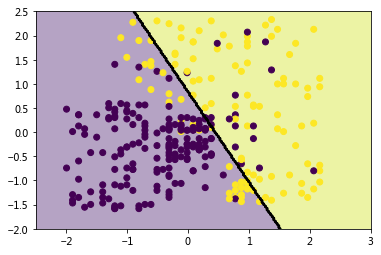

In [36]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

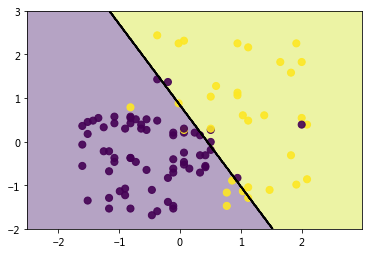

In [37]:
X, Y = np.meshgrid(np.arange(-2.5,3,0.01),np.arange(-2,3,0.01))
# X,Y = np.mgrid[-2.5:3:200j,-2:3:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=50,alpha=0.9)

# Day 7

## 什么是K-NN

K近邻算法是一种简单也是最常用的分类算法，它也可以应用于回归计算。
K-NN是无参数学习(它不会对底层数据的分布做出任何假设)，它是基于实例(意味着它不是显示的训练模型)并在有监督的学习环境中使用。

## 做出预测

若要对未标记的对象进行分类，则会计算出该对象对标记的对象之间的距离，确定其k近邻点，然后使用周边数量最多的最近邻点的类标签来确定该对象的类标签，对于实际中的输入的变量，最常用的距离变量是欧式距离。

## k的取值

k的取值并不容易，k值小意味这噪声会对结果产生较大的影响，而k值大则会使计算成本变高。这很大程度上取决于你的实际情况，有些情况下最好是遍历每个可能的k值，然后根据实际来选择k值。

## K-NN算法是怎样工作的

K-NN用于分类时，输出是一个类别。
这种方法有三个关键元素:一组标记的对象，例如:一组已存储的记录，对象之间的距离以及k的值(最近邻的数量)

## 距离度量

欧式距离是一个新点和一个现有点在所有属性上的差的平方之和的平方根。
其他常见的距离度量方法包括:
    Hamming Distance
    汉明距离
    Manhattan Distance
    曼哈顿距离
    Minkowski Distance
    闵氏距离

# Day8　了解逻辑回归背后的数学原理

了解逻辑回归一般解决yes or no 的问题，从[博客](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)学习并熟悉其数学原理，并手动推倒公式加深理解

# Day９　支持向量机

了解什么是支持向量机:通过其内核机制将数据投射到高维空间，使用超平面进行分类。<br>

超平面:能够将某个值最大化的平面，这个值为超平面离所有训练样本的最小距离<br>

间隔(margin)：这个最小距离为间隔<br>

核函数(kernel)：将数据从低维向高维映射，并且可以直接在原来的低维空间中进行计算，而不需要显式地写出映射后的结果<br>

高斯核函数能够上升到无限维，ｎ个２维点可以上升到ｎ维，通过计算||x-xi|| i=1,2,3....n<br>

正则化(regularization)：防止过拟合的情况发生，加上约束条件，将影响训练结果的维度的系数权重减小，甚至减小到0<br>

系数(gamma):系数定义了单个训练集合的影响程度，系数小的值，距离远的点也会用于计算，而系数大的值更多的使用距离近的点

# Day10 SVM和KNN

### 熟悉SVM和knn算法的知识:<br>
#### 1.SVM RBF 主要超参数概述:<br>
SVM分类器只要有两个参数，这两个参数分别是惩罚系数C和核函数本身的系数r。系数C在优化函数中主要平衡支持向量机的复杂度和误分类率之间的关系，可以理解为正则化系数.当Ｃ较大时，损失函数也会越大，这表示不愿意放弃比较远的离群点，这样我们会拥有更多的支持向量，也就是支持向量和超平面会更加复杂，也容易过拟合。反之，当Ｃ较小是意味着我们会抛弃离群点，选择较少的样本来做支持向量，最终的支持向量和超平面也会更加简单。<br>
另一个参数是RBF的核函数的参数r,r定义了单个样本对整个分类超平面的影响，当r越小时，单个样本对整个分类超平面的影响比较小，不容易被选择为支持向量，反之，当γ比较大时，单个样本对整个分类超平面的影响比较大，更容易被选择为支持向量.<br>
SVM回归模型的RBF核比分类模型多了一个损失距离度量参数ϵ,对于损失距离度量ϵ，它决定了样本点到超平面的距离损失，当ϵ比较大时,更多的点在损失距离范围之内，而没有损失,模型较简单，而当ϵ比较小时，损失函数会较大，模型也会变得复杂。

# Day11 knn的算法的实现

## The DataSet | Social Network

<img src='image/data.PNG'>

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/home/jakey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting K-NN to the Training set

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the Test set results

In [39]:
y_pred = knn.predict(x_test)

### Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)

In [41]:
cn

array([[64,  4],
       [ 3, 29]])

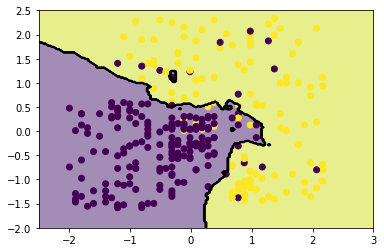

In [42]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
p3 = plt.scatter(x_train[:, 0] ,x_train[:, 1], c=y_train)

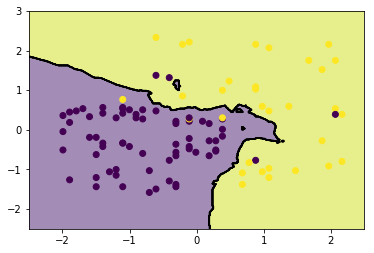

In [45]:
X ,Y = np.meshgrid(np.arange(-2.5, 2.5, 0.01), np.arange(-2.5, 3, 0.01))
Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X, Y, Z, colors=['k'], linestyles=['-'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

# Day12 Support Vector Machine

参考了[博客](https://blog.csdn.net/v_july_v/article/details/7624837),熟悉SVM的第一层和第二层境界，了解了第三层的公式推倒部分

# Day13 支持向量机的实现

## The DataSet | Social Network
<img src='image/data.PNG'>

### Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [27]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

/home/jakey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVC to the Training set

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0, C=1)
classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [22]:
y_pred = classifier.predict(x_test)

### Make the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Visualization

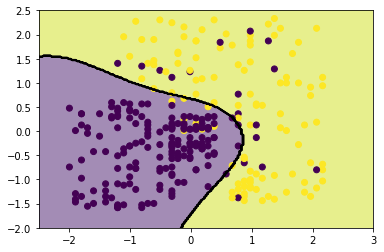

In [24]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
p3 = plt.scatter(x_train[:, 0] ,x_train[:, 1], c=y_train)

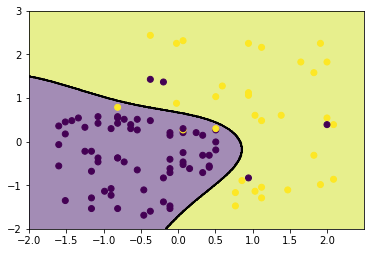

In [25]:
X ,Y = np.meshgrid(np.arange(-2, 2.5, 0.01), np.arange(-2, 3, 0.01))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X, Y, Z, colors=['k'], linestyles=['-'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

# Day14 朴素贝叶斯分类

朴素贝叶斯分类器技术基于所谓的贝叶斯定理，特别适用于输入维数较高的情况。尽管朴素贝叶斯很简单，但它通常可以胜过更复杂的分类方法：<br>
   运用贝叶斯定理进行分类：
                           <img src='./image/Bayes1.png'> <br>
   贝叶斯定理可以简化为:
                           <img src='./image/Bayes2.png'> <br>
   最后概率可以等价为:
                           <img src='./image/Bayes3.png'>  <br>
   
   求解过程为：
            1. 新的待分类项x分为维度{x1,x2...,xn} 
            2. 类别集合C = {y1,....,ym} 
            3. 求P(y1|x),...,P(ym|x)　
            4. x属于max{P(y1|x),...,P(ym|x)}
不同的朴素贝叶斯分类器主要区别于他们对分布的假设P(xi | y)

#### 高斯朴素贝叶斯

特征的假设符合高斯分布:
    <img src='./image/Gaussian Bayes.png'>

# Day15 朴素贝叶斯分类器(Naive Bayes Classifier)和黑盒机器学习(Black Box Machine Learning)

black box machine learning:我们无法真正知道深度学习网络或者机器学习的系数是如何决定输出的，输出的值你无法真正通过系数去把控。相当于牛顿定律告诉了人们质量和引力之间有数学关系，但不知道为什么不是其他量与引力有关呢?<br>
[博客](https://bloomberg.github.io/foml/#home)中的第一课给出了预测函数，特征提取，学习算法，性能评估，交叉验证，样本偏差，非平稳性，过度拟合和超参数调整的整体观点。

### [集成学习(ensemble learning):](https://www.cnblogs.com/pinard/p/6131423.html)
    对于训练集数据，我们通过训练若干个个体学习器，通过一定的结合策略，就可以最终形成一个强学习器，以达到博采众长的目的。
<img src='./image/ensemble.png'>

### 集成学习之个体学习器:
    第一种就是所有的个体学习器都是一个种类的，或者说是同质的。比如都是决策树个体学习器，或者都是神经网络个体学习器。第二种是所有的个体学习器不全是一个种类的，或者说是异质的。比如我们有一个分类问题，对训练集采用支持向量机个体学习器，逻辑回归个体学习器和朴素贝叶斯个体学习器来学习，再通过某种结合策略来确定最终的分类强学习器。
    目前大多是同质的学习器，比如boosting系列算法。

### 集成学习之Boosting:
    Boosting可以用一幅图表示为:
   <img src='./image/boosting.png'>

从图中可以看出，Boosting算法的工作机制是首先从训练集用初始权重训练出一个弱学习器1，根据弱学习的学习误差率表现来更新训练样本的权重，使得之前弱学习器1学习误差率高的训练样本点的权重变高，使得这些误差率高的点在后面的弱学习器2中得到更多的重视。然后基于调整权重后的训练集来训练弱学习器2.，如此重复进行，直到弱学习器数达到事先指定的数目T，最终将这T个弱学习器通过集合策略进行整合，得到最终的强学习器。

### [集成学习之Boosting中的Gradient Boosting Decison Tree](https://www.cnblogs.com/pinard/p/6140514.html)
    
  在GBDT的迭代中，假设我们前一轮迭代得到的强学习器是$f_{t-1}(x)$,损失函数是$L(y,f_{t-1}(x))$,我们本轮迭代的目标是找到一个CART回归树模型的弱学习器$h_t(x)$,让本轮的损失$L(y,f_t(x)=L(y,f_{t−1}(x)+h_t(x))$最小。也就是说，本轮迭代找到决策树，要让样本的损失尽量变得更小。<br>  
为了解决这里出现的问题:损失的拟合不好度量，损失函数各种各样，需要找到一个通用的拟合方法。针对这个问题，可以使用负梯度来拟合本轮损失的近似值，进而拟合一个CART回归树，对于第t轮的第i个样本的损失函数的负梯度表示为:$$r_{ti}=−\left[\frac{∂L(y_i,f(x_i))}{∂f(x_i)}\right]_{f(x)=f_{t−1}(x)}$$
利用$(xi,r_{ti})(i=1,2,..m)$,我们可以拟合一颗CART回归树，得到了第t颗回归树，其对应的叶节点区域$R_{tj}$,j=1,2,...,J。其中J为叶子节点的个数。<br>     
针对每一个叶子节点里的样本，我们求出使损失函数最小，也就是拟合叶子节点最好的的输出值$c_{tj}$如下：
$$c_{tj}=\underset{⏟c}{argmin}\sum_{xi∈R_{tj}} L(y_i,f_{t−1}(xi)+c)$$
<br>
这样我们就得到了本轮的决策树拟合函数如下：
$$h_t(x)=\sum_{j=1}^JC_{tj}I (x ∈ R_{tj})$$
<br>
从而本轮最终得到的强学习器的表达式如下：
$$f_t(x)=f_{t−1}(x)+\sum_{j=1}^JC_{tj}I(x∈R_{tj})$$
<br>
通过损失函数的负梯度来拟合，我们找到了一种通用的拟合损失误差的办法，这样无轮是分类问题还是回归问题，我们通过其损失函数的负梯度的拟合，就可以用GBDT来解决我们的分类回归问题。区别仅仅在于损失函数不同导致的负梯度不同而已。
### GBDT的回归算法
输入是训练集样本T={(x,$y_1$),($x_2$,$y_2$),...($x_m$,$y_m$)}， 最大迭代次数T, 损失函数L。
<br>  
输出是强学习器f(x)<br>  
1) 初始化弱学习器:$$f_{0}(x)=\underset{⏟c}{argmin}\sum_{i=1}^m L(y_i,c)$$
2) 对迭代轮数t=1,2,...T有:
<br>  
    a)对样本i=1,2，...m，计算负梯度:$$r_{ti}=−\left[\frac{∂L(y_i,f(x_i))}{∂f(x_i)}\right]_{f(x)=f_{t−1}(x)}$$
<br>  
    b)利用($x_i$,$r_{ti}$)(i=1,2,..m), 拟合一颗CART回归树,得到第t颗回归树，其对应的叶子节点区域为$R_{tj}$,j=1,2,...,J。其中J为回归树t的叶子节点的个数。
<br>  
    c) 对叶子区域j =1,2,..J,计算最佳拟合值:$$c_{tj}=\underset{⏟c}{argmin}\sum_{xi∈R_{tj}} L(y_i,f_{t−1}(xi)+c)$$
<br>  
    d) 更新强学习器:$$f_t(x)=f_{t−1}(x)+\sum_{j=1}^JC_{tj}I(x∈R_{tj})$$
<br>
3) 得到强学习器f(x)的表达式: $$f(x)=f_T(x)=f_0(x)+\sum_{t=1}^T\sum_{j=1}^J C_{tj}I(x∈R_{tj})$$
### GBDT分类算法
GBDT的分类算法从思想上和GBDT的回归算法没有区别，但是由于样本输出不是连续的值，而是离散的类别，导致我们无法直接从输出类别去拟合类别输出的误差。<br>  
为了解决这个问题，主要有两个方法，一个是用指数损失函数，此时GBDT退化为Adaboost算法。另一种方法是用类似于逻辑回归的对数似然损失函数的方法。也就是说，我们用的是类别的预测概率值和真实概率值的差来拟合损失。本文仅讨论用对数似然损失函数的GBDT分类。而对于对数似然损失函数，我们又有二元分类和多元分类的区别。
#### 二元GBDT分类算法:
对于二元GBDT，如果用类似于逻辑回归的对数似然损失函数，则损失函数为：$$L(y,f(x))=log(1+exp(−yf(x)))$$
<br>  
其中y∈{−1,+1}。则此时的负梯度误差为:$$r_{ti}=−\left[\frac{∂L(y_i,f(x_i))}{∂f(x_i)}\right]_{f(x)=f_{t−1}(x)}=y_i/(1+exp(yif(xi)))$$
<br>  
对于生成的决策树，我们各个叶子节点的最佳残差拟合值为:$$c_{tj}=\underset{⏟c}{argmin}\sum_{x_i∈R_{tj}} log(1+exp(−y_i(f_{t−1}(x_i)+c))$$
<br>  
由于上式比较难优化，我们一般使用近似值代替:
$$c_{tj}=\sum_{x_i∈R_{tj}}r_{ti}\backslash \sum_{x_i∈R_{tj}}|r_{ti}|(1−|r_{ti}|)$$
<br>
除了负梯度计算和叶子节点的最佳残差拟合的线性搜索，二元GBDT分类和GBDT回归算法过程相同。
### 多元GBDT分类算法
多元GBDT要比二元GBDT复杂一些，对应的是多元逻辑回归和二元逻辑回归的复杂度差别。假设类别数为K，则此时我们的对数似然损失函数为：
$$L(y,f(x))=−\sum_{k=1}^Ky_klogp_k(x)$$
<br>
其中如果样本输出类别为k，则yk=1。第k类的概率pk(x)的表达式为：
$$p_k(x)=exp(f_k(x))\backslash \sum_{l=1}^Kexp(f_l(x))$$
<br>  
集合上两式，我们可以计算出第t轮的第i个样本对应类别l的负梯度误差为
$$r_{til}=−\left[∂L(y_i,f(x_i)))∂f(x_i)\right]_{f_k(x)=f_{l,t−1}(x)}=y_{il}−p_{l,t−1}(x_i)$$
<br>
观察上式可以看出，其实这里的误差就是样本i对应类别l的真实概率和t−1轮预测概率的差值。<br>
对于生成的决策树，我们各个叶子节点的最佳残差拟合值:
$$c_{tjl}=\underset{⏟c_{jl}}{argmin}\sum_{i=0}^m\sum_{k=1}^KL(y_k,f_{t−1},l(x)+\sum_{j=0}^Jc_{jl}I(x_i∈R_{tj})$$
<br>  
由于上式比较难优化，我们一般使用近似值代替
$$c_{tjl}=\frac{K−1}{K}\frac{\sum_{x_i∈R_{tjl}}r_{til}}{\sum_{x_i∈R_{til}}|r_{til}|(1−|r_{til}|)}$$
除了负梯度计算和叶子节点的最佳残差拟合的线性搜索，多元GBDT分类和二元GBDT分类以及GBDT回归算法过程相同。
### GBDT常用损失函数
这里我们再对常用的GBDT损失函数做一个总结。<br>
对于分类算法，其损失函数一般有对数损失函数和指数损失函数两种:<br>
a) 如果是指数损失函数，则损失函数表达式为:
$$L(y,f(x))=exp(−yf(x))$$
对于回归算法，常用损失函数有如下4种:
a)均方差，这个是最常见的回归损失函数了
$$L(y,f(x))=(y−f(x))^2$$
b)绝对损失，这个损失函数也很常见
$$L(y,f(x))=|y−f(x)|$$
对应负梯度误差为：
$$sign(y_i−f(x_i))$$
c)Huber损失，它是均方差和绝对损失的折衷产物，对于远离中心的异常点，采用绝对损失，而中心附近的点采用均方差。这个界限一般用分位数点度量。损失函数如下：
$$L(y,f(x))=\begin{cases}\frac{1}{2}(y−f(x))^2,&|y−f(x)|≤δ\\δ(|y−f(x)|−\frac{δ}{2}) &|y−f(x)|>δ\end{cases}$$
对应的负梯度误差为：
$$r(y_i,f(x_i))=\begin{cases}y_i−f(x_i),&|yi−f(x_i)|≤δ\\δsign(y_i−f(x_i)),&|y_i−f(x_i)|>δ\end{cases}$$
d) 分位数损失。它对应的是分位数回归的损失函数，表达式为
$$L(y,f(x))=\sum_{y≥f(x)}θ|y−f(x)|+\sum_{y<f(x)}(1−θ)|y−f(x)|$$
其中θ为分位数，需要我们在回归前指定。对应的负梯度误差为：
$$r(y_i,f(x_i))=\begin{cases}θ,&y_i≥f(x_i)\\θ−1,&y_i<f(x_i)\end{cases}$$
对于Huber损失和分位数损失，主要用于健壮回归，也就是减少异常点对损失函数的影响。
### GBDT的正则化
第一种是和Adaboost类似的正则化项，即步长(learning rate)。定义为ν,对于前面的弱学习器的迭代
$$f_k(x)=f_{k−1}(x)+h_k(x)$$
如果我们加上了正则化项，则有
$$f_k(x)=f_{k−1}(x)+νh_k(x)$$
ν的取值范围为0<ν≤1。对于同样的训练集学习效果，较小的ν意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。
<br>  
第二种正则化的方式是通过子采样比例（subsample）。取值为(0,1]。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5-0.8]之间。
<br>  
用了子采样的GBDT有时也称作随机梯度提升树(Stochastic Gradient Boosting Tree, SGBT)。由于使用了子采样，程序可以通过采样分发到不同的任务去做boosting的迭代过程，最后形成新树，从而减少弱学习器难以并行学习的弱点。

### GBDT的调参实现
首先，我们先看boosting框架相关的重要参数

　　　　1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

　　　　2) learning_rate: 即每个弱学习器的权重缩减系数ν，也称作步长，在原理篇的正则化章节我们也讲到了，加上了正则化项，我们的强学习器的迭代公式为fk(x)=fk−1(x)+νhk(x)。ν的取值范围为0<ν≤1。对于同样的训练集拟合效果，较小的ν意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。一般来说，可以从一个小一点的ν开始调参，默认是1。

　　　　3) subsample: 即我们在原理篇的正则化章节讲到的子采样，取值为(0,1]。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间，默认是1.0，即不使用子采样。

　　　　4) init: 即我们的初始化的时候的弱学习器，拟合对应原理篇里面的f0(x)，如果不输入，则用训练集样本来做样本集的初始化分类回归预测。否则用init参数提供的学习器做初始化分类回归预测。一般用在我们对数据有先验知识，或者之前做过一些拟合的时候，如果没有的话就不用管这个参数了。

　　　　5) loss: 即我们GBDT算法中的损失函数。分类模型和回归模型的损失函数是不一样的。

　　　　　　对于分类模型，有对数似然损失函数"deviance"和指数损失函数"exponential"两者输入选择。默认是对数似然损失函数"deviance"。在原理篇中对这些分类损失函数有详细的介绍。一般来说，推荐使用默认的"deviance"。它对二元分离和多元分类各自都有比较好的优化。而指数损失函数等于把我们带到了Adaboost算法。

　　　　　　对于回归模型，有均方差"ls", 绝对损失"lad", Huber损失"huber"和分位数损失“quantile”。默认是均方差"ls"。一般来说，如果数据的噪音点不多，用默认的均方差"ls"比较好。如果是噪音点较多，则推荐用抗噪音的损失函数"huber"。而如果我们需要对训练集进行分段预测的时候，则采用“quantile”。

　　　　6) alpha：这个参数只有GradientBoostingRegressor有，当我们使用Huber损失"huber"和分位数损失“quantile”时，需要指定分位数的值。默认是0.9，如果噪音点较多，可以适当降低这个分位数的值。
<br>  
弱学习器的参数:<br>　
    　 
      1) 划分时考虑的最大特征数max_features: 可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑log2N个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑N‾‾√个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比xN）取整后的特征数。其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。

　　　　2) 决策树最大深度max_depth: 默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

　　　　3) 内部节点再划分所需最小样本数min_samples_split: 这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

　　　　4) 叶子节点最少样本数min_samples_leaf: 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

　　　　5）叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

　　　　6) 最大叶子节点数max_leaf_nodes: 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

　　　　7) 节点划分最小不纯度min_impurity_split:  这个值限制了决策树的增长，如果某节点的不纯度(基于基尼系数，均方差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。一般不推荐改动默认值1e-7。

### GBDT调参实例:

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train.shape,y_train.shape
lb = StandardScaler()
x_train = lb.fit_transform(x_train)
x_test = lb.fit_transform(x_test)

/home/jakey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
GBoost = GradientBoostingClassifier()
GBoost.fit(x_train,y_train)
GBoost.score(x_test,y_test)

0.9375

In [105]:
#首先从步长learning_rate和n_estimators开始调参,设置步长为0.1
GBoost = GradientBoostingClassifier(learning_rate=0.1)
param_test1 = {'n_estimators':range(1,25,1)}
grid_search1 = GridSearchCV(GBoost,
                           param_grid = param_test1,
                           cv=5,
                           n_jobs=10)
grid_search1.fit(x_train,y_train)
grid_search1.best_score_,grid_search1.best_params_

(0.9, {'n_estimators': 16})

In [106]:
#找到了一个合适的迭代次数，现在我们开始对决策树进行调参。
#首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。
GBoost = GradientBoostingClassifier(learning_rate=0.1,n_estimators=16)
param_test2 = {'max_depth':range(1,14,1), 'min_samples_split':range(2,100,2)}
grid_search2 = GridSearchCV(GBoost,
                           param_grid = param_test2,
                           cv=5,
                           n_jobs=10)
grid_search2.fit(x_train,y_train)
grid_search2.best_score_,grid_search2.best_params_,grid_search2.best_estimator_

(0.909375,
 {'max_depth': 4, 'min_samples_split': 38},
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=38,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))

In [107]:
#由于决策树深度7是一个比较合理的值，我们把它定下来，对于内部节点再划分所需最小样本数min_samples_split，
#我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。
#下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。。
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False)
param_test3 = {'min_samples_split':range(35,45,1), 'min_samples_leaf':range(1,20,1)}
grid_search3 = GridSearchCV(GBoost,
                           param_grid = param_test3,
                           cv=5,
                           n_jobs=10)
grid_search3.fit(x_train,y_train)
grid_search3.best_score_,grid_search3.best_params_,grid_search3.best_estimator_

(0.9125,
 {'min_samples_leaf': 11, 'min_samples_split': 39},
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))

In [108]:
#对max_feature进行调参
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False)
param_test4 = {'max_features':[1,2]}
grid_search4 = GridSearchCV(GBoost,
                           param_grid = param_test4,
                           cv=5,
                           n_jobs=10)
grid_search4.fit(x_train,y_train)
grid_search4.best_score_,grid_search4.best_params_,grid_search4.best_estimator_

(0.9125,
 {'max_features': 2},
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=2, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))

In [109]:
#对子采样的比例进行调参
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, verbose=0,
               warm_start=False)
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.99,1]}
grid_search5 = GridSearchCV(GBoost,
                           param_grid = param_test5,
                           cv=5,
                           n_jobs=10)
grid_search5.fit(x_train,y_train)
grid_search5.best_score_,grid_search5.best_params_,grid_search5.best_estimator_

(0.9125,
 {'subsample': 1},
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1, verbose=0,
               warm_start=False))

In [110]:
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=16,
               presort='auto', random_state=None, subsample=1, verbose=0,
               warm_start=False)
GBoost.fit(x_train,y_train)
GBoost.score(x_test,y_test)

0.925

In [111]:
#现在我们基本已经得到我们所有调优的参数结果了。这时我们可以减半步长，最大迭代次数加倍来增加我们模型的泛化能力。再次拟合我们的模型：
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.05, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=32,
               presort='auto', random_state=None, subsample=1, verbose=0,
               warm_start=False)
GBoost.fit(x_train,y_train)
GBoost.score(x_test,y_test)

0.925

In [112]:
#下面我们继续将步长缩小5倍，最大迭代次数增加5倍，继续拟合我们的模型：
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.01, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=160,
               presort='auto', random_state=None, subsample=1, verbose=0,
               warm_start=False)
GBoost.fit(x_train,y_train)
GBoost.score(x_test,y_test)

0.925

In [128]:
#在减半learning_rate,加倍迭代轮数
GBoost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.02, loss='deviance', max_depth=4,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=11, min_samples_split=39,
               min_weight_fraction_leaf=0.0, n_estimators=250,
               presort='auto', random_state=None, subsample=1, verbose=0,
               warm_start=False)
GBoost.fit(x_train,y_train)
y_pred = GBoost.predict(x_test)
GBoost.score(x_test,y_test)

0.9375

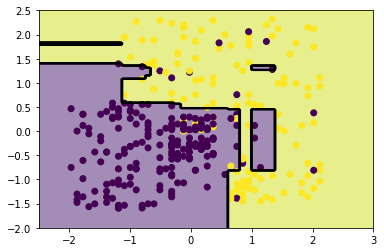

In [129]:
import matplotlib.pyplot as plt
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = GBoost.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_train[:, 0] ,x_train[:, 1], c=y_train)

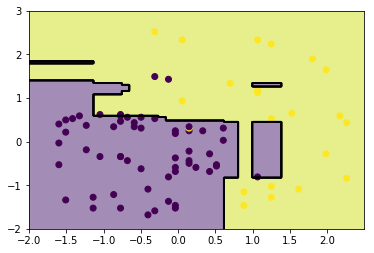

In [130]:
X ,Y = np.meshgrid(np.arange(-2, 2.5, 0.01), np.arange(-2, 3, 0.01))
Z = GBoost.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X, Y, Z, colors=['k'], linestyles=['-'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

# Day16 通过内核技巧实现支持向量机

使用scikit-learn库实现了SVM算法以及内核函数，该函数将我们的数据点映射到更高维度以找到最佳超平面。

# Day16 决策树